<a href="https://colab.research.google.com/github/Trisha1208/Baisc-ML-Projects/blob/main/task61.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trisha Baldha

Task-6 : Prediction using Decision Tree Algorithm


In [55]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Read the dataset 
#Removing the entres with null targets
X_full = pd.read_csv('/content/drive/MyDrive/Iris.csv', index_col = 'Id')
X_full.dropna(axis = 0, subset = ['Species'], inplace=True)

y = X_full.Species


Exploratory Data Analysis

In [57]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [58]:
X_full.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


<function matplotlib.pyplot.show>

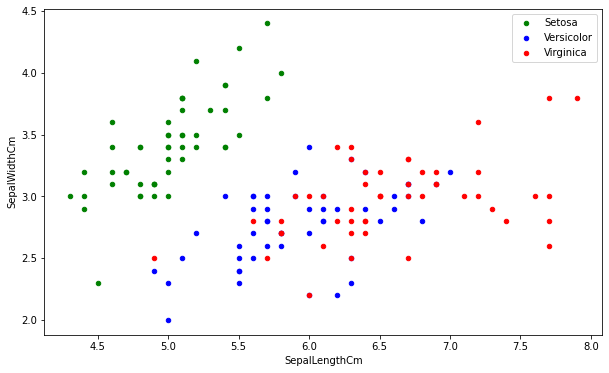

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = X_full[X_full.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color= 'green', label = 'Setosa') 
X_full[X_full.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y= 'SepalWidthCm', color = 'blue', label='Versicolor', ax=fig)
X_full[X_full.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y= 'SepalWidthCm', color = 'red', label='Virginica', ax=fig)
fig.set_xlabel = 'SepalLengthCm'
fig.set_ylabel = 'SepalWidthCm'
fig.set_title = 'Length vs Width'
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show

<function matplotlib.pyplot.show>

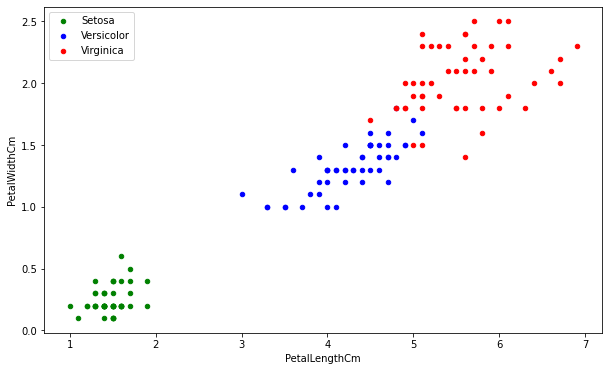

In [60]:
fig1 = X_full[X_full.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color= 'green', label = 'Setosa') 
X_full[X_full.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y= 'PetalWidthCm', color = 'blue', label='Versicolor', ax=fig1)
X_full[X_full.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y= 'PetalWidthCm', color = 'red', label='Virginica', ax=fig1)
fig1.set_xlabel = 'PetalLengthCm'
fig1.set_ylabel = 'PetalWidthCm'
fig1.set_title = 'Length vs Width'
fig1 = plt.gcf()
fig1.set_size_inches(10, 6)
plt.show

Petal features are giving better division than sepal features. Hence Petal's features are important feature than sepal's features.

<function matplotlib.pyplot.show>

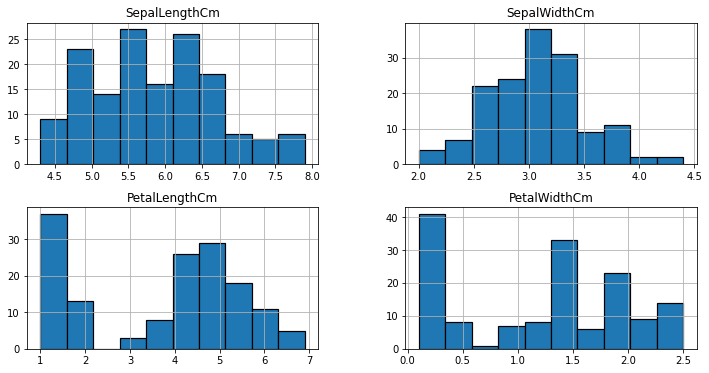

In [61]:
X_full.hist(edgecolor='black', linewidth='1.2')
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show

In [62]:
X_full.drop(['Species'], axis = 1, inplace = True)

#Splitting the dataset into training and testing
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y, train_size = 0.8, test_size = 0.2, random_state = 2) 

Training the model

In [63]:
from sklearn.tree import DecisionTreeClassifier
my_model = DecisionTreeClassifier(random_state = 0, criterion = 'gini', max_depth = 4)

#parameter tuning using GridSearchCV
param_dict = {
    'criterion':['gini', 'entropy'],
    'max_depth':[1,2,3,4,5,6,None]
}

from sklearn.model_selection import GridSearchCV

my_grid = GridSearchCV(my_model, param_grid = param_dict, cv = 7)
my_grid.fit(X_train, y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, None]},
      

In [64]:
my_grid.best_score_

0.9663865546218489

In [65]:
my_grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [66]:
#training the model using above parameters
my_model.fit(X_train, y_train)

#predicting on test data
predictions = my_model.predict(X_valid)


In [67]:
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

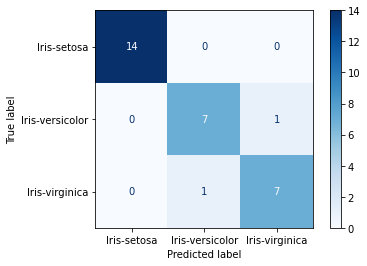

In [68]:

from sklearn.metrics import plot_confusion_matrix

#Checking the model accuracy 
plot_confusion_matrix(my_model, X_valid, y_valid, cmap = 'Blues')

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, predictions)


0.9333333333333333

Visualize the Decision Tree Classifier

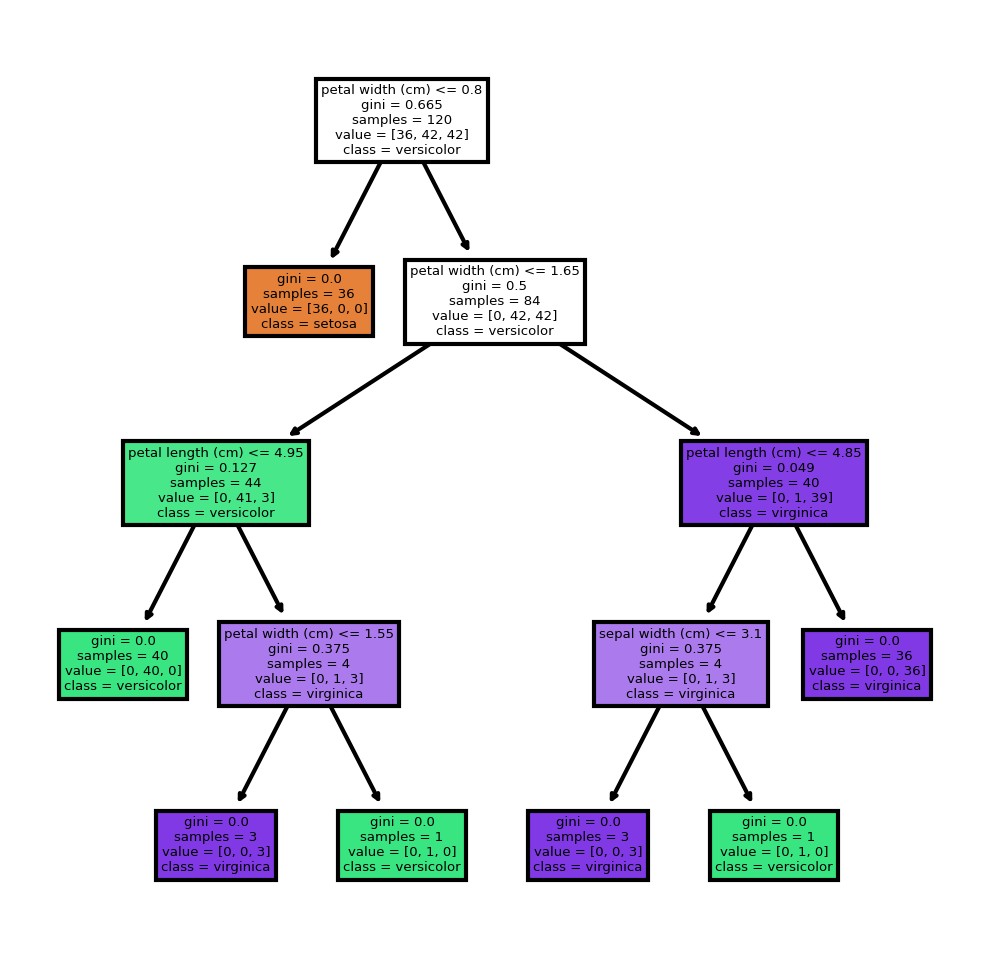

In [70]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(my_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')